# Partial Sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Things to be done here

1) write algorithm for agent3, agent4 <br>
2) if object_matrix is knowledge base, then lets rename it to knowledge base to avoid confusion and have unambiguous variable names.<br>
3) Import A* code into this file.

## Things done here

1) declared the set of global variables required
2) renamed object_matrix to knowledge_base

In [1]:
from ipynb.fs.full.project1 import *
import numpy as np
from ipynb.fs.full.partial_sensing import *

In [2]:
maze_size = 10
probability = 0.3
global agent_gridworld
global helper_matrix
global helper_matrix
global full_grid_world_matrix
global visited_list
global path
global number_of_bumps
global knowledge_base
global expression_list
global infered_list

visited_list = []
infered_list = []
expression_list = []
number_of_bumps = 0
agent_gridworld = np.matrix(np.zeros((maze_size, maze_size)))
confirmed_path = [] #path that agent 3 has recognized
helper_matrix = np.full((maze_size, maze_size), 0)
full_grid_world_matrix = np.full((maze_size, maze_size), 0)

# knowledge_base is used to store the inference/ knowledge base of objects(nodes) with it's respective indices
knowledge_base = np.array([partial_sensing(int(item/maze_size),item%maze_size,maze_size) for item in range(maze_size * maze_size)]).reshape(maze_size, maze_size)


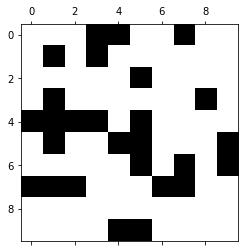

In [3]:
# full_grid_world_matrix = populateMatrix(maze_size, probability)

#### Use either the above line in the block or the below set of lines of code to get the full grid world

full_grid_world_matrix = [[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]

full_grid_world_matrix = np.matrix(full_grid_world_matrix)
plt.spy(full_grid_world_matrix)

In [4]:
def blockedNeighbors(n, row, col):
    
    global full_grid_world_matrix
    direction_list = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    
    count = 0
    for direction in direction_list:
        row_new = row + direction[0]
        col_new = col + direction[1]
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            if full_grid_world_matrix[row_new, col_new] == 1:
                count += 1
    return count

def initialize_helper_matrix(n):
    dir = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    global helper_matrix
    for x in range(n):
        for y in range(n):
            count = blockedNeighbors(n, x, y)
            helper_matrix[x][y] = count


In [5]:
def initialize_all_matrices(dim):
    global knowledge_base
    initialize_helper_matrix(maze_size)
    # initializing getNx
    for i in range(maze_size):
        for j in range(maze_size):
            knowledge_base[i][j].Nx = getNx(i, j, maze_size)
            knowledge_base[i][j].Cx = helper_matrix[i][j]

In [6]:
def get_agent_gridworld_from_knowledge_base(object_matrix):
    global maze_size

    agent_gridworld = np.zeros((maze_size, maze_size))
    for i in range(maze_size):
        for j in range(maze_size):
            if object_matrix.item((i,j)).blocked == 1:
                agent_gridworld[i][j] = 1
    return agent_gridworld

In [7]:
def getNx(row, col, n):
    if (row ==0  and col == 0) or (row == 0 and col == n-1) or (row==n-1 and col==0) or (row ==n-1 and col==n-1):
        return 3
    
    elif row == 0 or col == 0 or col == n-1 or row == n-1:
        return 5
    else:
        return 8

In [8]:
def get_neighbors(row, col, n):
    #top left node
    if (row ==0  and col == 0) :
        return [(row+1, col), (row, col+1), (row+1, col+1)]
    
    #top right node
    elif (row == 0 and col == n-1):
        return [(row, col-1), (row+1, col), (row+1, col-1)]
    
    #bottom left node
    elif (row==n-1 and col==0):
        return [(row-1, col), (row, col+1), (row-1, col+1)]
    
    #bottom right node
    elif (row ==n-1 and col==n-1):
        return [(row-1, col-1), (row, col-1), (row-1, col-1)]

    # top edge nodes
    elif row == 0:
        return [(row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1), (row, col+1)]
    
    # bottom edge nodes
    elif row == n-1:
        return [(row, col-1), (row-1, col-1), (row-1, col), (row-1, col+1), (row, col+1)]
    
    # left edge nodes
    elif col == 0:
        return [(row-1, col), (row-1, col+1), (row, col+1), (row+1, col+1), (row+1, col)]
    
    # right edge nodes
    elif col == n-1:
        return [(row-1, col), (row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col)]
    else:
        return [(row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1),\
               (row, col+1), (row-1, col+1), (row-1, col)]
    


# Code for Agent 4 goes here

In [10]:
def agent4(maze_size, source): # using this name for the lack of a better name. please change.
    global visited_list
    global number_of_bumps
    global knowledge_base
    global agent_gridworld
    global full_grid_world_matrix
    global confirmed_path
    global infered_list
    global expression_list
    global number_of_bumps
    global confirmed_path

#     source = (0,0,0)
    _,_,_,path = astar(source,agent_gridworld)
    path = path[::-1]
    print('path', path)
    if path == []:
        goal_reached = False
        return visited_list, number_of_bumps, infered_list, goal_reached
    goal_reached = False
    knowledge_base[0][0].blocked = 0
    i = 0

    for node in path:
        print("___________________________________________________________________________________________")
        print("The current node is: ", node)
        row = node[0]
        col = node[1]
        
        # terminate the program if we reach the goal node
        if (row, col) == (maze_size - 1, maze_size - 1):
            goal_reached = True
            print("goal reached")
            visited_list.append((row,col))
            confirmed_path.append((row,col))
            return visited_list, number_of_bumps, infered_list, goal_reached
        
        # retrieve the respective object from knowledge base
        node_object = knowledge_base[row][col]
        node_object.blocked = full_grid_world_matrix.item((row, col))
        if node_object.blocked == 0:
            previously_unblocked_node = (row,col)
        
        # if the current node isn't visited previously then add it to visited list and trajectory path
        if ((row,col)) not in visited_list:
            visited_list.append((row,col))
            confirmed_path.append((row,col))
            print(visited_list)

        #if node is blocked, update the agent grid world and run inference engine with the current node's blocked status
        # recursively call the agent4 function to fetch an alternative path to goal node
        if node_object.blocked == 1:
            if not ((row, col)) in infered_list:
                number_of_bumps += 1
            print(row, col, "is blocked")
            agent_gridworld.itemset((row, col), 1)
            node_object.visited = True
            knowledge_base, infered_list, expression_list, agent_gridworld  = node_object.inference_engine(visited_list, infered_list, knowledge_base, expression_list, agent_gridworld)
            confirmed_path.remove((row,col))
            visited_list, number_of_bumps, infered_list, goal_reached = agent4(maze_size, previously_unblocked_node + (0,))
            if goal_reached == True:
                return confirmed_path, number_of_bumps, infered_list, goal_reached
        
        else:
            # this block runs if the node is free, it updates the knowledge base and runs the inference engine
            print(row, col, "is free")
            neighborlist = get_neighbors(row, col, maze_size)
            node_object.neighbor_list = neighborlist
            knowledge_base, infered_list,expression_list, agent_gridworld  = node_object.inference_engine(visited_list, infered_list, knowledge_base, expression_list, agent_gridworld)
        node_object.visited = True
        print('infered_list',infered_list)
        i+=1
#         if i == 4:
#             break

    return confirmed_path, number_of_bumps, infered_list, goal_reached

# Main function

In [11]:
initialize_all_matrices(maze_size)
path, number_of_bumps, infered_list, goal_reached = agent4(maze_size, (0,0,0))
if not goal_reached:
    print("Goal cannot be reached")

path [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
___________________________________________________________________________________________
The current node is:  (0, 0)
[(0, 0)]
0 0 is free
infered_list []
___________________________________________________________________________________________
The current node is:  (0, 1)
[(0, 0), (0, 1)]
0 1 is free
infered_list []
___________________________________________________________________________________________
The current node is:  (1, 1)
[(0, 0), (0, 1), (1, 1)]
1 1 is blocked
path [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
___________________________________________________________________________________________
The current node is:  (0, 1)
0 1 is free
Infered the node is:  node(10)
infered_list [(1, 0)]
_____________________

infered node is:  -node(49)
infered node is:  -node(49)
infered_list [(1, 0), (1, 2), (1, 3), (2, 1), (4, 9), (4, 8)]
___________________________________________________________________________________________
The current node is:  (7, 8)
[(0, 0), (0, 1), (1, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3), (4, 3), (3, 4), (3, 5), (4, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (5, 8), (5, 9), (6, 8), (6, 9), (7, 8)]
7 8 is free
infered_list [(1, 0), (1, 2), (1, 3), (2, 1), (4, 9), (4, 8)]
___________________________________________________________________________________________
The current node is:  (7, 9)
[(0, 0), (0, 1), (1, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3), (4, 3), (3, 4), (3, 5), (4, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (5, 8), (5, 9), (6, 8), (6, 9), (7, 8), (7, 9)]
7 9 is free
Infered the node is:  node(77) - 1
infered node is:  -node(89)
infered node is:  -node(89)
infered_list [(1, 0), (1, 2), (1, 3), (2, 1), (4, 9), (4, 8), (7, 7),

Number_of_bumps 7
The number of nodes infered:  10
Infered_list:  [(1, 0), (1, 2), (1, 3), (2, 1), (4, 9), (4, 8), (7, 7), (8, 9), (8, 8), (8, 7)]
NOTE: The infered nodes also include the free nodes that were infered before visiting
Trajectory Path [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]
Trajectory length 19


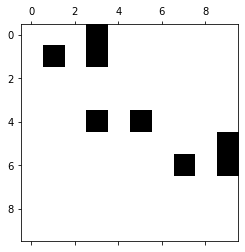

In [12]:
print('Number_of_bumps', number_of_bumps)
print('The number of nodes infered: ', len(infered_list))
print('Infered_list: ', infered_list)
print("NOTE: The infered nodes also include the free nodes that were infered before visiting")
plt.spy(agent_gridworld)
print("Trajectory Path", path)
print("Trajectory length", len(path))

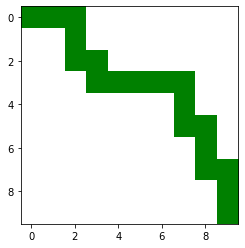

In [13]:
path_matrix = np.full((maze_size, maze_size), 0)
for i in path:
    path_matrix[i] = 1
colormap = colors.ListedColormap(["white","black","green"])
plt.imshow(path_matrix, cmap=colormap)
plt.show()

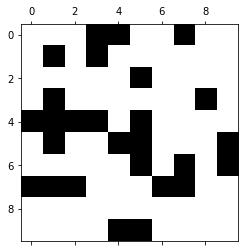

In [14]:
plt.spy(full_grid_world_matrix)